In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
dataset_train = pd.read_csv('Stock_Price_Train.csv')
training_set = dataset_train.iloc[:, 1:2].values

In [8]:
print(dataset_train.shape)
dataset_train.head()

(1258, 6)


,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,1/6/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,1/9/2012,322.04,322.29,309.46,620.76,"11,688,800"


In [9]:
dataset_train.tail()

,Date,Open,High,Low,Close,Volume
1253,12/23/2016,790.90,792.74,787.28,789.91,"623,400"
1254,12/27/2016,790.68,797.86,787.66,791.55,"789,100"
1255,12/28/2016,793.70,794.23,783.20,785.05,"1,153,800"
1256,12/29/2016,783.33,785.93,778.92,782.79,"744,300"
1257,12/30/2016,782.75,782.78,770.41,771.82,"1,770,000"


In [10]:
training_set

array([[325.25],
       [331.27],
       [329.83],
       ...,
       [793.7 ],
       [783.33],
       [782.75]])

In [11]:
training_set.shape

(1258, 1)

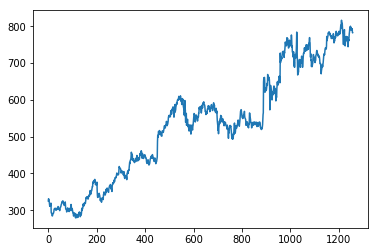

In [24]:
import matplotlib.pyplot as plt
plt.plot(training_set)

In [12]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)

In [13]:
training_set_scaled

array([[0.08581368],
       [0.09701243],
       [0.09433366],
       ...,
       [0.95725128],
       [0.93796041],
       [0.93688146]])

In [14]:
X_train = []
y_train = []

In [15]:
for i in range(60, 1258):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])
    
X_train, y_train = np.array(X_train), np.array(y_train)

In [18]:
print(X_train.shape)
X_train

(1198, 60)


array([[0.08581368, 0.09701243, 0.09433366, ..., 0.07846566, 0.08034452,
        0.08497656],
       [0.09701243, 0.09433366, 0.09156187, ..., 0.08034452, 0.08497656,
        0.08627874],
       [0.09433366, 0.09156187, 0.07984225, ..., 0.08497656, 0.08627874,
        0.08471612],
       ...,
       [0.92106928, 0.92438053, 0.93048218, ..., 0.95475854, 0.95204256,
        0.95163331],
       [0.92438053, 0.93048218, 0.9299055 , ..., 0.95204256, 0.95163331,
        0.95725128],
       [0.93048218, 0.9299055 , 0.93113327, ..., 0.95163331, 0.95725128,
        0.93796041]])

In [19]:
print(y_train.shape)
y_train

(1198,)


array([0.08627874, 0.08471612, 0.07454052, ..., 0.95725128, 0.93796041,
       0.93688146])

In [20]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [21]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout


regressor = Sequential()

regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

regressor.add(Dense(units = 1))




Using TensorFlow backend.


In [22]:
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')


In [23]:
regressor.fit(X_train, y_train, epochs = 100, batch_size = 32)

Epoch 1/100
1198/1198 [==============================] - 14s 12ms/step - loss: 0.0409
Epoch 2/100
1198/1198 [==============================] - 9s 7ms/step - loss: 0.0079
Epoch 3/100
1198/1198 [==============================] - 8s 7ms/step - loss: 0.0060
Epoch 4/100
1198/1198 [==============================] - 8s 7ms/step - loss: 0.0057
Epoch 5/100
1198/1198 [==============================] - 8s 7ms/step - loss: 0.0049
Epoch 6/100
1198/1198 [==============================] - 8s 7ms/step - loss: 0.0049
Epoch 7/100
1198/1198 [==============================] - 8s 7ms/step - loss: 0.0045
Epoch 8/100
1198/1198 [==============================] - 8s 7ms/step - loss: 0.0055
Epoch 9/100
1198/1198 [==============================] - 8s 7ms/step - loss: 0.0043
Epoch 10/100
1198/1198 [==============================] - 8s 7ms/step - loss: 0.0045
Epoch 11/100
1198/1198 [==============================] - 8s 7ms/step - loss: 0.0044
Epoch 12/100
1198/1198 [==============================] - 8s 7ms/step - 

1198/1198 [==============================] - 8s 7ms/step - loss: 0.0015
Epoch 98/100
1198/1198 [==============================] - 8s 7ms/step - loss: 0.0016
Epoch 99/100
1198/1198 [==============================] - 8s 7ms/step - loss: 0.0014
Epoch 100/100
1198/1198 [==============================] - 8s 7ms/step - loss: 0.0015


# Predcitions


In [26]:
dataset_test = pd.read_csv('Stock_Price_Test.csv')
real_stock_price = dataset_test.iloc[:, 1:2].values

In [27]:
print(dataset_test.shape)
dataset_test.head()

(20, 6)


,Date,Open,High,Low,Close,Volume
0,1/3/2017,778.81,789.63,775.80,786.14,"1,657,300"
1,1/4/2017,788.36,791.34,783.16,786.90,"1,073,000"
2,1/5/2017,786.08,794.48,785.02,794.02,"1,335,200"
3,1/6/2017,795.26,807.90,792.20,806.15,"1,640,200"
4,1/9/2017,806.40,809.97,802.83,806.65,"1,272,400"


In [29]:
print(real_stock_price.shape)
real_stock_price

(20, 1)


array([[778.81],
       [788.36],
       [786.08],
       [795.26],
       [806.4 ],
       [807.86],
       [805.  ],
       [807.14],
       [807.48],
       [807.08],
       [805.81],
       [805.12],
       [806.91],
       [807.25],
       [822.3 ],
       [829.62],
       [837.81],
       [834.71],
       [814.66],
       [796.86]])

In [30]:
dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']), axis = 0)

In [31]:
print(dataset_total.shape)
dataset_total.head()

(1278,)


0    325.25
1    331.27
2    329.83
3    328.34
4    322.04
Name: Open, dtype: float64

In [32]:
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)

In [33]:
X_test = []

In [34]:
for i in range(60, 80):
    X_test.append(inputs[i-60:i, 0])

In [35]:
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

In [36]:
predicted_stock_price = regressor.predict(X_test)

In [37]:
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

In [38]:
predicted_stock_price

array([[771.1832 ],
       [768.5996 ],
       [768.40173],
       [769.5294 ],
       [772.54474],
       [777.9243 ],
       [783.2244 ],
       [785.8806 ],
       [786.55206],
       [786.3658 ],
       [786.0569 ],
       [785.784  ],
       [785.6371 ],
       [786.10077],
       [786.98865],
       [790.9263 ],
       [797.19104],
       [804.268  ],
       [808.6843 ],
       [805.9834 ]], dtype=float32)

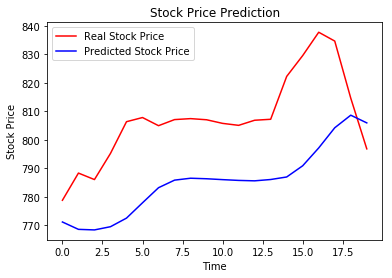

In [40]:
plt.plot(real_stock_price, color = 'red', label = 'Real Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted Stock Price')
plt.title('Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()